In [1]:
from sklearn.datasets import load_iris

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.30)

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset (or replace with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a reasonable range of k values
k_values = range(1, 21)  # Testing k values from 1 to 20
train_errors = []
test_errors = []

# Train and evaluate the model for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on training and testing sets
    train_preds = knn.predict(X_train)
    test_preds = knn.predict(X_test)
    
    # Calculate error rates
    train_error = 1 - accuracy_score(y_train, train_preds)
    test_error = 1 - accuracy_score(y_test, test_preds)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the error rates
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error', marker='o')
plt.plot(k_values, test_errors, label='Testing Error', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
k_values = range(1,21)
train_error= []
test_error=[]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_errors = 1-accuracy_score(y_train, train_pred)
    test_errors = 1-accuracy_score(y_test, test_pred)
    train_error.append(train_errors)
    test_error.append(test_errors)

In [13]:
import matplotlib.pyplot as plt

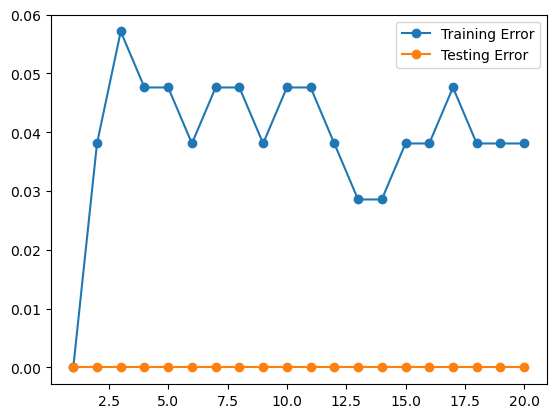

In [14]:
plt.plot(k_values, train_error, label='Training Error', marker='o')
plt.plot(k_values, test_error, label='Testing Error', marker='o')
plt.legend()
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
model = knn.fit(X_train, y_train)

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
cr = classification_report(y_test, y_pred)

In [33]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
Problem Statement: Customer Purchase Prediction
Objective:
Develop a k-Nearest Neighbors (k-NN) model to predict whether a customer will make a purchase based on their behavior and demographic data.

Background:
A retail company has collected data on 100 customers, including various features such as age, gender, browsing history, previous purchases, and time spent on the website. The company aims to improve its marketing strategies by predicting which customers are likely to make a purchase during their next visit.

Dataset:
The dataset contains 100 samples with the following features:

Age: Age of the customer (numeric).
Gender: Gender of the customer (categorical: Male, Female).
Browsing History: Number of products viewed during the last visit (numeric).
Previous Purchases: Number of previous purchases made by the customer (numeric).
Time Spent on Website: Time spent on the website during the last visit (numeric, in minutes).
Purchase Made: Whether a purchase was made during the last visit (binary: Yes, No) - this is the target variable.
Problem:
The goal is to build a k-NN model that can accurately classify whether a customer will make a purchase based on their demographic information and online behavior.

Deliverables:
A trained k-NN model capable of predicting the likelihood of a customer making a purchase.
Evaluation of the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.
Analysis of the model's performance and insights on which features most influence the predictions.
Constraints:
The dataset consists of only 100 samples, which may limit the model's accuracy and generalizability.
Feature scaling or normalization might be required to ensure that all features contribute equally to the distance calculations in k-NN.
The choice of the number of neighbors (k) needs to be optimized to balance bias and variance in the model.
Success Criteria:
A successful model will have a high accuracy in predicting purchases, helping the company target potential buyers more effectively. Additionally, the model should provide insights into customer behavior that can inform marketing strategies.

In [37]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
num_samples = 100

# Generate Age: Random integers between 18 and 70
ages = np.random.randint(18, 71, size=num_samples)

# Generate Gender: Randomly assign Male or Female
genders = np.random.choice(['Male', 'Female'], size=num_samples)

# Generate Browsing History: Random integers between 1 and 50
browsing_history = np.random.randint(1, 51, size=num_samples)

# Generate Previous Purchases: Random integers between 0 and 20
previous_purchases = np.random.randint(0, 21, size=num_samples)

# Generate Time Spent on Website: Random integers between 1 and 120 minutes
time_spent = np.random.randint(1, 121, size=num_samples)

# Generate Purchase Made: Based on some rule, e.g., if time_spent > 60 and browsing_history > 10
purchase_prob = (time_spent > 60) & (browsing_history > 10)
purchase_made = np.where(purchase_prob, 'Yes', 'No')

# Create the DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Browsing History': browsing_history,
    'Previous Purchases': previous_purchases,
    'Time Spent on Website': time_spent,
    'Purchase Made': purchase_made
})

# Display the first few rows of the DataFrame
print(df.head())

# Save the DataFrame to a CSV file (optional)
df.to_csv('synthetic_dataset.csv', index=False)


   Age  Gender  Browsing History  Previous Purchases  Time Spent on Website  \
0   56  Female                 6                   2                    104   
1   69  Female                28                   6                     33   
2   46  Female                28                  15                      9   
3   32    Male                44                  15                     43   
4   60    Male                44                  19                    118   

  Purchase Made  
0            No  
1            No  
2            No  
3            No  
4           Yes  


In [45]:
df

,Age,Gender,Browsing History,Previous Purchases,Time Spent on Website,Purchase Made
0,56,0,6,2,104,No
1,69,0,28,6,33,No
2,46,0,28,15,9,No
3,32,1,44,15,43,No
4,60,1,44,19,118,Yes
...,...,...,...,...,...,...
95,64,0,50,14,12,No
96,70,0,23,1,117,Yes
97,41,0,31,9,1,No
98,43,1,30,1,58,No


In [46]:
df.columns

Index(['Age', 'Gender', 'Browsing History', 'Previous Purchases',
       'Time Spent on Website', 'Purchase Made'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder

In [44]:
df['Gender'] = l.fit_transform(df['Gender'])

In [43]:
l = LabelEncoder()

In [47]:
df['Purchase Made'] = l.fit_transform(df['Purchase Made'])

In [49]:
X  = df.drop('Purchase Made', axis=1)
y = df['Purchase Made']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.20)

In [52]:
param = {'n_neighbors': list(range(1,21))}

In [53]:
from sklearn.model_selection import GridSearchCV


In [54]:
knn = KNeighborsClassifier()

In [55]:
Grid_search = GridSearchCV(estimator=knn, param_grid = param, cv=5, scoring='accuracy')

In [58]:
Grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [62]:
best = Grid_search.best_params_['n_neighbors']

In [65]:
knn1 = KNeighborsClassifier(n_neighbors=3)

In [66]:
model1= knn1.fit(X_train,y_train)


In [67]:
y_pred = model1.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
cr1 = classification_report(y_test, y_pred)

In [71]:
print(cr1)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.83      0.62      0.71         8

    accuracy                           0.80        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.80      0.80      0.79        20

